In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.legend_handler import HandlerLine2D

# 设置全局字体为 Times New Roman
plt.rcParams['font.family'] = 'Times New Roman'

# 启用 LaTeX 渲染
plt.rcParams['text.usetex'] = True

# 定义图例处理器
class ColorLineStyleHandler(HandlerLine2D):
    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # 获取线条的颜色、样式和标签
        color = orig_handle.get_color()
        linestyle = orig_handle.get_linestyle()
        label = orig_handle.get_label()

        # 创建一个新的 Line2D 对象，设置线条的颜色、样式和标签，并添加文本标注
        line = plt.Line2D([0, width], [height // 2, height // 2],
                         linestyle=linestyle, color=color, linewidth=2)
        return [line]

### Trotter-Suzuki

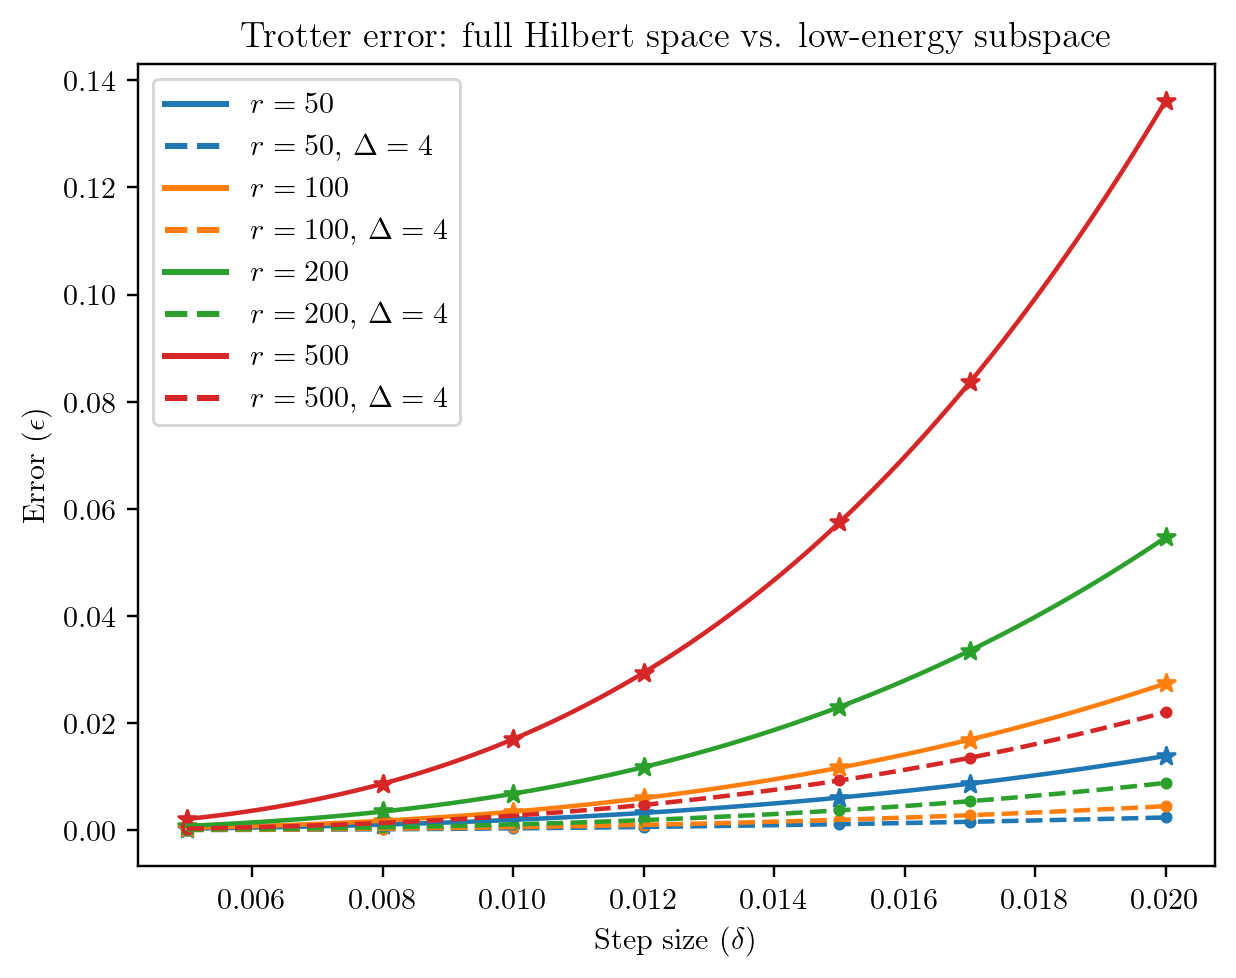

In [7]:
# Trotter Error on 2x6 Heisenberg Model
Delta = 4
File = '../Trotter/norm_2x6_4.mat'

r_50 = loadmat(File)['r_50'].flatten()
r_50_Delta = loadmat(File)['r_50_Delta'].flatten()
r_100 = loadmat(File)['r_100'].flatten()
r_100_Delta = loadmat(File)['r_100_Delta'].flatten()
r_200 = loadmat(File)['r_200'].flatten()
r_200_Delta = loadmat(File)['r_200_Delta'].flatten()
r_500 = loadmat(File)['r_500'].flatten()
r_500_Delta = loadmat(File)['r_500_Delta'].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

coefficients_r_50 = np.polyfit(dt, r_50, 3) 
poly_r_50 = np.poly1d(coefficients_r_50)
coefficients_r_50_Delta = np.polyfit(dt, r_50_Delta, 3) 
poly_r_50_Delta = np.poly1d(coefficients_r_50_Delta)

coefficients_r_100 = np.polyfit(dt, r_100, 3)  
poly_r_100 = np.poly1d(coefficients_r_100)
coefficients_r_100_Delta = np.polyfit(dt, r_100_Delta, 3)  
poly_r_100_Delta = np.poly1d(coefficients_r_100_Delta)

coefficients_r_200 = np.polyfit(dt, r_200, 3) 
poly_r_200 = np.poly1d(coefficients_r_200)
coefficients_r_200_Delta = np.polyfit(dt, r_200_Delta, 3) 
poly_r_200_Delta = np.poly1d(coefficients_r_200_Delta)

coefficients_r_500 = np.polyfit(dt, r_500, 3) 
poly_r_500 = np.poly1d(coefficients_r_500)
coefficients_r_500_Delta = np.polyfit(dt, r_500_Delta, 3)  
poly_r_500_Delta = np.poly1d(coefficients_r_500_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, r_50, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_r_50(dt_new), color = '#1f77b4', linestyle = '-', label='$r=50$')

ax.scatter(dt, r_50_Delta, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_r_50_Delta(dt_new), color = '#1f77b4', linestyle = '--', label='$r=50$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_100, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100(dt_new), color = '#ff7f0e', linestyle = '-', label='$r=100$')

ax.scatter(dt, r_100_Delta, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_r_100_Delta(dt_new), color = '#ff7f0e', linestyle = '--', label='$r=100$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_200, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_r_200(dt_new), color = '#2ca02c', linestyle = '-', label='$r=200$')

ax.scatter(dt, r_200_Delta, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_r_200_Delta(dt_new), color = '#2ca02c', linestyle = '--', label='$r=200$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, r_500, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_r_500(dt_new), color = '#d62728', linestyle = '-', label='$r=500$')

ax.scatter(dt, r_500_Delta, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_r_500_Delta(dt_new), color = '#d62728', linestyle = '--', label='$r=500$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('Trotter-2x6.pdf', dpi=600, format='pdf')

### qDRIFT

-0.5045566292047126
-0.62722575014362
-0.514046958696547
-0.6294847061384536
-0.48478118756293653
-0.6467404852512297
-0.5039521605460782
-0.6509751442365046


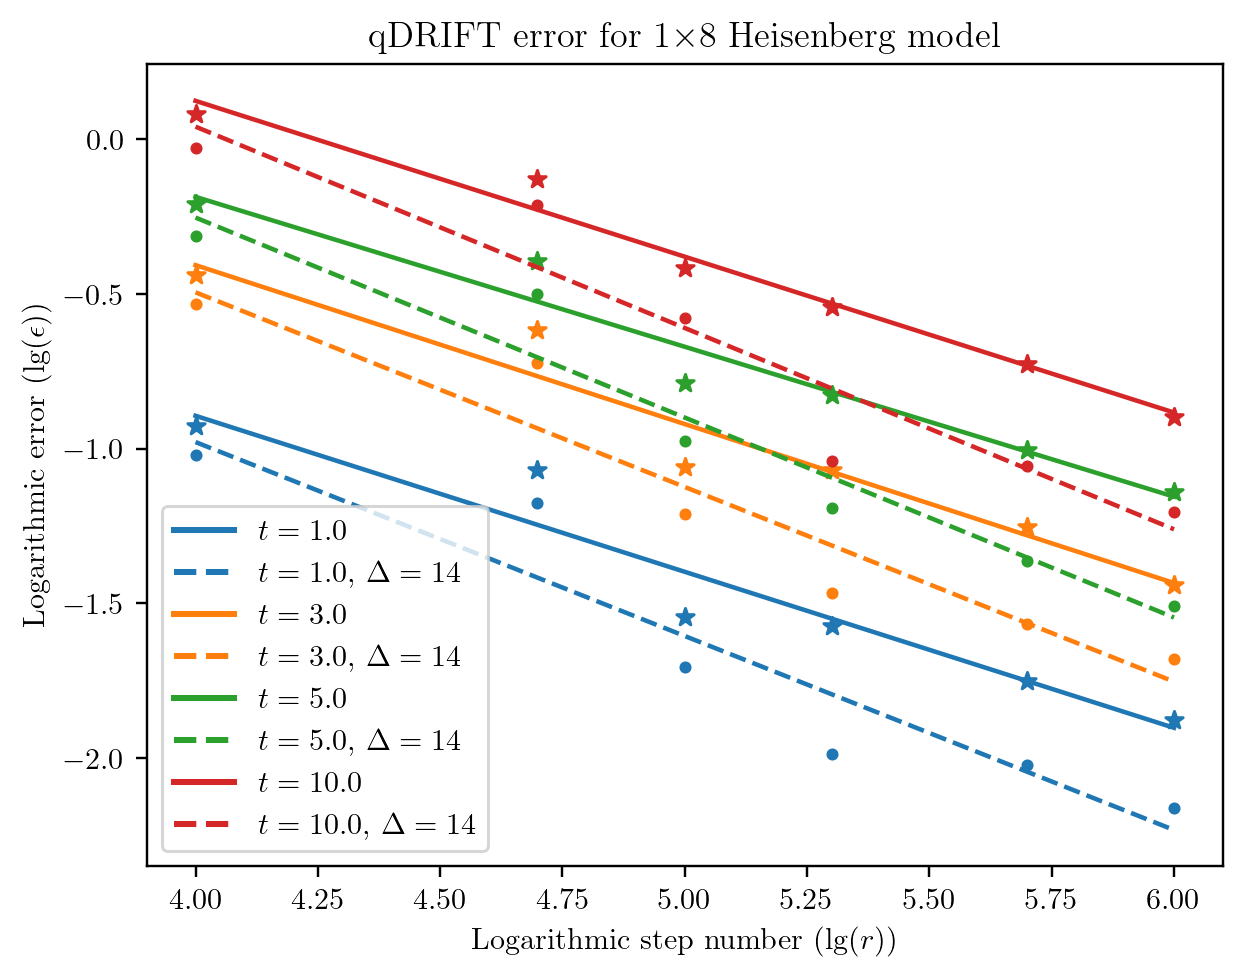

In [3]:
# qDRIFT Error on 1x8 Heisenberg Model
Delta = 14
File = '../qDRIFT/norm_1x8_14.mat'

t_1 = np.log(np.array(loadmat(File)['t_1'].flatten()))/np.log(10)
t_1_Delta = np.log(np.array(loadmat(File)['t_1_Delta'].flatten()))/np.log(10)
t_3 = np.log(np.array(loadmat(File)['t_3'].flatten()))/np.log(10)
t_3_Delta = np.log(np.array(loadmat(File)['t_3_Delta'].flatten()))/np.log(10)
t_5 = np.log(np.array(loadmat(File)['t_5'].flatten()))/np.log(10)
t_5_Delta = np.log(np.array(loadmat(File)['t_5_Delta'].flatten()))/np.log(10)
t_10 = np.log(np.array(loadmat(File)['t_10'].flatten()))/np.log(10)
t_10_Delta = np.log(np.array(loadmat(File)['t_10_Delta'].flatten()))/np.log(10)

step_number = np.log(np.array([10000,50000,100000,200000,500000,1000000]))/np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

coefficients_t_1 = np.polyfit(step_number, t_1, 1) 
poly_t_1 = np.poly1d(coefficients_t_1)
coefficients_t_1_Delta = np.polyfit(step_number, t_1_Delta, 1) 
poly_t_1_Delta = np.poly1d(coefficients_t_1_Delta)

coefficients_t_3 = np.polyfit(step_number, t_3, 1)  
poly_t_3 = np.poly1d(coefficients_t_3)
coefficients_t_3_Delta = np.polyfit(step_number, t_3_Delta, 1)  
poly_t_3_Delta = np.poly1d(coefficients_t_3_Delta)

coefficients_t_5 = np.polyfit(step_number, t_5, 1) 
poly_t_5 = np.poly1d(coefficients_t_5)
coefficients_t_5_Delta = np.polyfit(step_number, t_5_Delta, 1) 
poly_t_5_Delta = np.poly1d(coefficients_t_5_Delta)

coefficients_t_10 = np.polyfit(step_number, t_10, 1) 
poly_t_10 = np.poly1d(coefficients_t_10)
coefficients_t_10_Delta = np.polyfit(step_number, t_10_Delta, 1)  
poly_t_10_Delta = np.poly1d(coefficients_t_10_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('qDRIFT error for 1$\\times$8 Heisenberg model')
ax.set_xlabel('Logarithmic step number ($\lg(r)$)')
ax.set_ylabel('Logarithmic error ($\lg(\epsilon)$)')

ax.scatter(step_number, t_1, marker = '*', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1(step_number_new), color = '#1f77b4', linestyle = '-', label='$t=1.0$')

ax.scatter(step_number, t_1_Delta, marker ='.', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1_Delta(step_number_new), color = '#1f77b4', linestyle = '--', label='$t=1.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_3, marker = '*', color = '#ff7f0e')
ax.plot(step_number_new, poly_t_3(step_number_new), color = '#ff7f0e', linestyle = '-', label='$t=3.0$')

ax.scatter(step_number, t_3_Delta, marker ='.', color = '#ff7f0e')
ax.plot(step_number_new, poly_t_3_Delta(step_number_new), color = '#ff7f0e', linestyle = '--', label='$t=3.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_5, marker = '*', color = '#2ca02c')
ax.plot(step_number_new, poly_t_5(step_number_new), color = '#2ca02c', linestyle = '-', label='$t=5.0$')

ax.scatter(step_number, t_5_Delta, marker ='.', color = '#2ca02c')
ax.plot(step_number_new, poly_t_5_Delta(step_number_new), color = '#2ca02c', linestyle = '--', label='$t=5.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_10, marker = '*', color = '#d62728')
ax.plot(step_number_new, poly_t_10(step_number_new), color = '#d62728', linestyle = '-', label='$t=10.0$')

ax.scatter(step_number, t_10_Delta, marker ='.', color = '#d62728')
ax.plot(step_number_new, poly_t_10_Delta(step_number_new), color = '#d62728', linestyle = '--', label='$t=10.0$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

print(poly_t_1[1])
print(poly_t_1_Delta[1])
print(poly_t_3[1])
print(poly_t_3_Delta[1])
print(poly_t_5[1])
print(poly_t_5_Delta[1])
print(poly_t_10[1])
print(poly_t_10_Delta[1])

fig.savefig('qDRIFT-1x8.pdf', dpi=600, format='pdf')

1.1065598065656013
0.2776630439336196
1.1217226634891713
0.5144113677462451
1.2081899874887423
0.33360425552516304
1.4668538841017509
0.7401892169759131


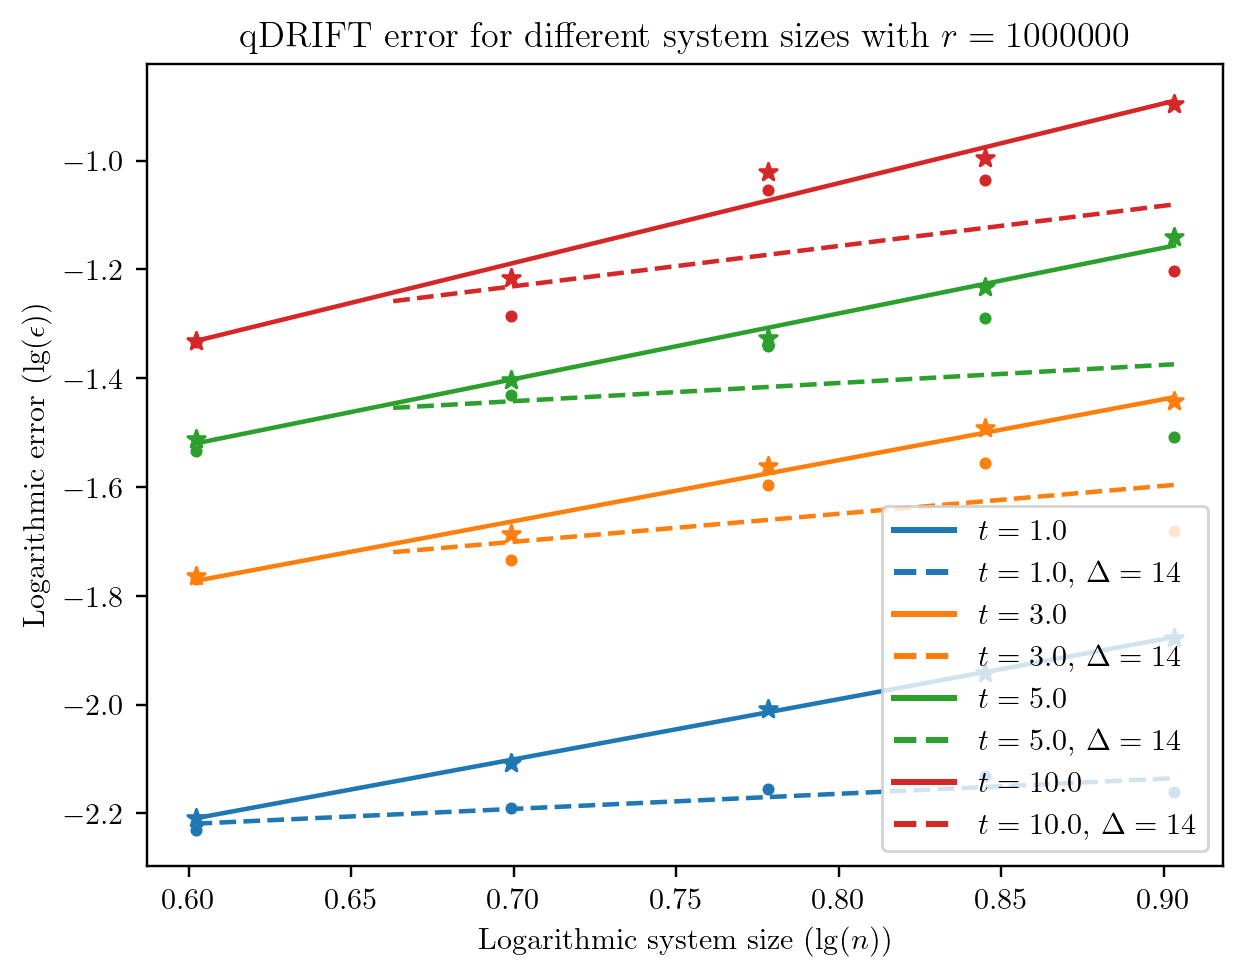

In [18]:
# qDRIFT Error on Heisenberg Model: n-dependence, fix r = 1000000
Delta = 14
index = 5 # 1000000
n_4 = '../qDRIFT/norm_1x4_14.mat'
n_5 = '../qDRIFT/norm_1x5_14.mat'
n_6 = '../qDRIFT/norm_1x6_14.mat' # 10.01
n_7 = '../qDRIFT/norm_1x7_14.mat' # 12.01
n_8 = '../qDRIFT/norm_1x8_14.mat'
# n_9 = '../qDRIFT/norm_1x9_16.mat'

t_1 = np.array([(loadmat(n_4)['t_1'].flatten())[index], (loadmat(n_5)['t_1'].flatten())[index], (loadmat(n_6)['t_1'].flatten())[index], (loadmat(n_7)['t_1'].flatten())[index], (loadmat(n_8)['t_1'].flatten())[index]]) #(loadmat(n_9)['t_1'].flatten())[index]])
t_1_Delta = np.array([(loadmat(n_4)['t_1_Delta'].flatten())[index], (loadmat(n_5)['t_1_Delta'].flatten())[index], (loadmat(n_6)['t_1_Delta'].flatten())[index], (loadmat(n_7)['t_1_Delta'].flatten())[index], (loadmat(n_8)['t_1_Delta'].flatten())[index]]) #(loadmat(n_9)['t_1_Delta'].flatten())[index]])
t_3 = np.array([(loadmat(n_4)['t_3'].flatten())[index], (loadmat(n_5)['t_3'].flatten())[index], (loadmat(n_6)['t_3'].flatten())[index], (loadmat(n_7)['t_3'].flatten())[index], (loadmat(n_8)['t_3'].flatten())[index]]) #(loadmat(n_9)['t_3'].flatten())[index]])
t_3_Delta = np.array([(loadmat(n_4)['t_3_Delta'].flatten())[index], (loadmat(n_5)['t_3_Delta'].flatten())[index], (loadmat(n_6)['t_3_Delta'].flatten())[index], (loadmat(n_7)['t_3_Delta'].flatten())[index], (loadmat(n_8)['t_3_Delta'].flatten())[index]]) #(loadmat(n_9)['t_3_Delta'].flatten())[index]])
t_5 = np.array([(loadmat(n_4)['t_5'].flatten())[index], (loadmat(n_5)['t_5'].flatten())[index], (loadmat(n_6)['t_5'].flatten())[index], (loadmat(n_7)['t_5'].flatten())[index], (loadmat(n_8)['t_5'].flatten())[index]]) #(loadmat(n_9)['t_5'].flatten())[index]])
t_5_Delta = np.array([(loadmat(n_4)['t_5_Delta'].flatten())[index], (loadmat(n_5)['t_5_Delta'].flatten())[index], (loadmat(n_6)['t_5_Delta'].flatten())[index], (loadmat(n_7)['t_5_Delta'].flatten())[index], (loadmat(n_8)['t_5_Delta'].flatten())[index]]) #(loadmat(n_9)['t_5_Delta'].flatten())[index]])
t_10 = np.array([(loadmat(n_4)['t_10'].flatten())[index], (loadmat(n_5)['t_10'].flatten())[index], (loadmat(n_6)['t_10'].flatten())[index], (loadmat(n_7)['t_10'].flatten())[index], (loadmat(n_8)['t_10'].flatten())[index]]) #(loadmat(n_9)['t_10'].flatten())[index]])
t_10_Delta = np.array([(loadmat(n_4)['t_10_Delta'].flatten())[index], (loadmat(n_5)['t_10_Delta'].flatten())[index], (loadmat(n_6)['t_10_Delta'].flatten())[index], (loadmat(n_7)['t_10_Delta'].flatten())[index], (loadmat(n_8)['t_10_Delta'].flatten())[index]]) #(loadmat(n_9)['t_10_Delta'].flatten())[index]])

t_1 = np.log(t_1)/np.log(10)
t_1_Delta = np.log(t_1_Delta)/np.log(10)
t_3 = np.log(t_3)/np.log(10)
t_3_Delta = np.log(t_3_Delta)/np.log(10)
t_5 = np.log(t_5)/np.log(10)
t_5_Delta = np.log(t_5_Delta)/np.log(10)
t_10 = np.log(t_10)/np.log(10)
t_10_Delta = np.log(t_10_Delta)/np.log(10)

step_number = np.array([4, 5, 6, 7, 8])
step_number = np.log(step_number)/np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

k = 1
coefficients_t_1 = np.polyfit(step_number, t_1, k) 
poly_t_1 = np.poly1d(coefficients_t_1)
coefficients_t_1_Delta = np.polyfit(step_number, t_1_Delta, k) 
poly_t_1_Delta = np.poly1d(coefficients_t_1_Delta)

coefficients_t_3 = np.polyfit(step_number, t_3, k)  
poly_t_3 = np.poly1d(coefficients_t_3)
coefficients_t_3_Delta = np.polyfit(step_number, t_3_Delta, k)  
poly_t_3_Delta = np.poly1d(coefficients_t_3_Delta)

coefficients_t_5 = np.polyfit(step_number, t_5, k) 
poly_t_5 = np.poly1d(coefficients_t_5)
coefficients_t_5_Delta = np.polyfit(step_number, t_5_Delta, k) 
poly_t_5_Delta = np.poly1d(coefficients_t_5_Delta)

coefficients_t_10 = np.polyfit(step_number, t_10, k) 
poly_t_10 = np.poly1d(coefficients_t_10)
coefficients_t_10_Delta = np.polyfit(step_number, t_10_Delta, k)  
poly_t_10_Delta = np.poly1d(coefficients_t_10_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('qDRIFT error for different system sizes with $r=1000000$')
ax.set_xlabel('Logarithmic system size ($\lg(n)$)')
ax.set_ylabel('Logarithmic error ($\lg(\epsilon)$)')

ax.scatter(step_number, t_1, marker = '*', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1(step_number_new), color = '#1f77b4', linestyle = '-', label='$t=1.0$')

ax.scatter(step_number, t_1_Delta, marker ='.', color = '#1f77b4')
ax.plot(step_number_new, poly_t_1_Delta(step_number_new), color = '#1f77b4', linestyle = '--', label='$t=1.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_3, marker = '*', color = '#ff7f0e')
ax.plot(step_number_new, poly_t_3(step_number_new), color = '#ff7f0e', linestyle = '-', label='$t=3.0$')

ax.scatter(step_number, t_3_Delta, marker ='.', color = '#ff7f0e')
ax.plot(step_number_new[20:], poly_t_3_Delta(step_number_new)[20:], color = '#ff7f0e', linestyle = '--', label='$t=3.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_5, marker = '*', color = '#2ca02c')
ax.plot(step_number_new, poly_t_5(step_number_new), color = '#2ca02c', linestyle = '-', label='$t=5.0$')

ax.scatter(step_number, t_5_Delta, marker ='.', color = '#2ca02c')
ax.plot(step_number_new[20:], poly_t_5_Delta(step_number_new)[20:], color = '#2ca02c', linestyle = '--', label='$t=5.0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, t_10, marker = '*', color = '#d62728')
ax.plot(step_number_new, poly_t_10(step_number_new), color = '#d62728', linestyle = '-', label='$t=10.0$')

ax.scatter(step_number, t_10_Delta, marker ='.', color = '#d62728')
ax.plot(step_number_new[20:], poly_t_10_Delta(step_number_new)[20:], color = '#d62728', linestyle = '--', label='$t=10.0$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

print(poly_t_1[1])
print(poly_t_1_Delta[1])
print(poly_t_3[1])
print(poly_t_3_Delta[1])
print(poly_t_5[1])
print(poly_t_5_Delta[1])
print(poly_t_10[1])
print(poly_t_10_Delta[1])

fig.savefig('qDRIFT-n.pdf', dpi=600, format='pdf')

### Random Permutation

-2.0960288242229947
-2.122433994874426
-2.1229852133521425
-2.106433248405153
-4.0495908158814204
-4.186138290982978
-4.148859383778486
-4.202202281977013


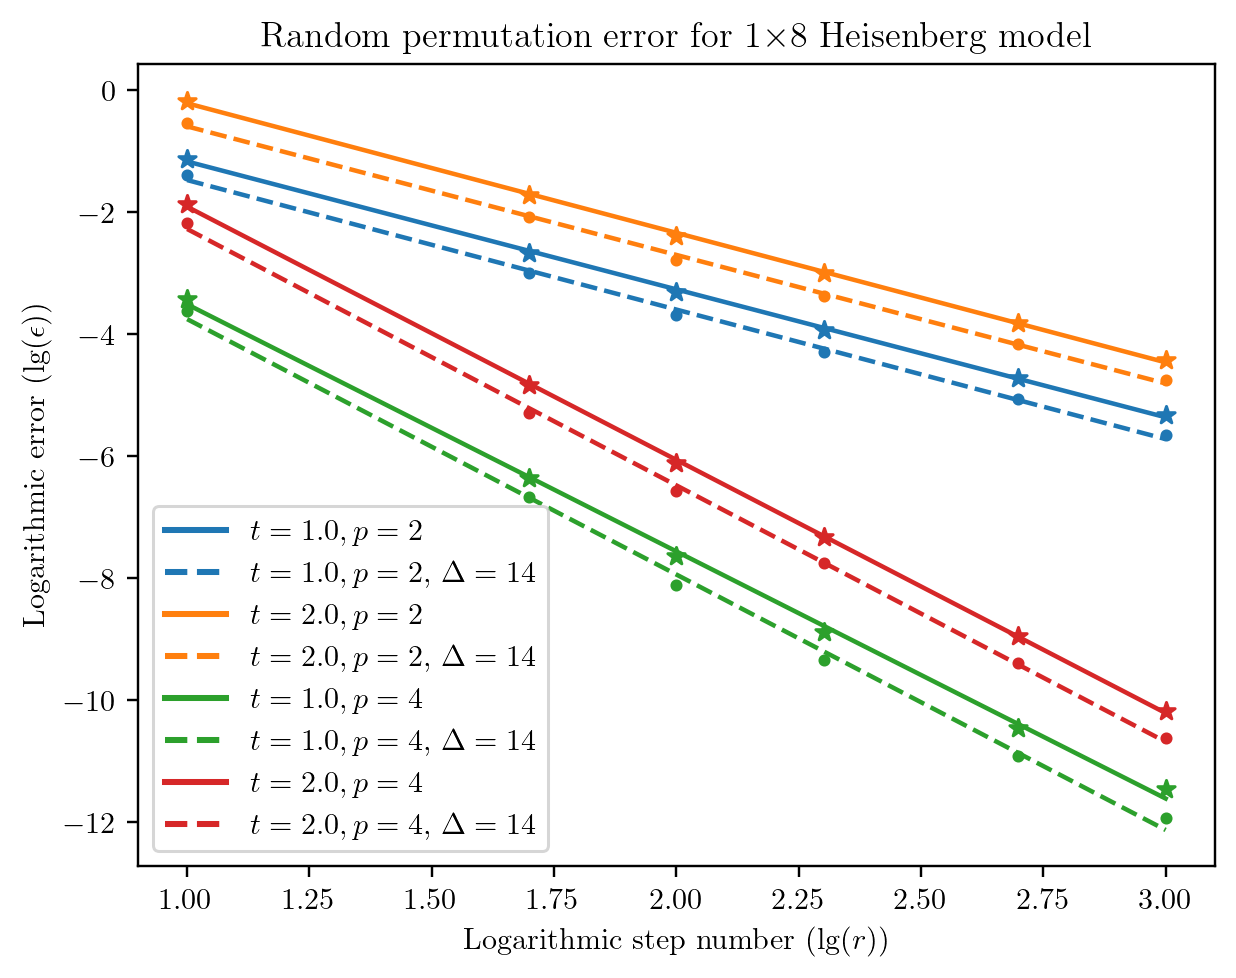

In [52]:
# Random Permutation Error on 1x8 Heisenberg Model
Delta = 14
File = '../Permutation/norm_1x8_14.mat'

p_2_1 = np.log(loadmat(File)['p_2_1'].flatten())/np.log(10)
p_2_1_Delta = np.log(loadmat(File)['p_2_1_Delta'].flatten())/np.log(10)
p_2_2 = np.log(loadmat(File)['p_2_2'].flatten())/np.log(10)
p_2_2_Delta = np.log(loadmat(File)['p_2_2_Delta'].flatten())/np.log(10)
p_4_1 = np.log(loadmat(File)['p_4_1'].flatten())/np.log(10)
p_4_1_Delta = np.log(loadmat(File)['p_4_1_Delta'].flatten())/np.log(10)
p_4_2 = np.log(loadmat(File)['p_4_2'].flatten())/np.log(10)
p_4_2_Delta = np.log(loadmat(File)['p_4_2_Delta'].flatten())/np.log(10)

step_number = np.log(np.array([10,50,100,200,500,1000]))/np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

# 多项式拟合
coefficients_p_2_1 = np.polyfit(step_number, p_2_1, 1) 
poly_p_2_1 = np.poly1d(coefficients_p_2_1)
coefficients_p_2_1_Delta = np.polyfit(step_number, p_2_1_Delta, 1) 
poly_p_2_1_Delta = np.poly1d(coefficients_p_2_1_Delta)

coefficients_p_2_2 = np.polyfit(step_number, p_2_2, 1)  
poly_p_2_2 = np.poly1d(coefficients_p_2_2)
coefficients_p_2_2_Delta = np.polyfit(step_number, p_2_2_Delta, 1)  
poly_p_2_2_Delta = np.poly1d(coefficients_p_2_2_Delta)

coefficients_p_4_1 = np.polyfit(step_number, p_4_1, 1) 
poly_p_4_1 = np.poly1d(coefficients_p_4_1)
coefficients_p_4_1_Delta = np.polyfit(step_number, p_4_1_Delta, 1) 
poly_p_4_1_Delta = np.poly1d(coefficients_p_4_1_Delta)

coefficients_p_4_2 = np.polyfit(step_number, p_4_2, 1) 
poly_p_4_2 = np.poly1d(coefficients_p_4_2)
coefficients_p_4_2_Delta = np.polyfit(step_number, p_4_2_Delta, 1)  
poly_p_4_2_Delta = np.poly1d(coefficients_p_4_2_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Random permutation error for 1$\\times$8 Heisenberg model')
ax.set_xlabel('Logarithmic step number ($\lg(r)$)')
ax.set_ylabel('Logarithmic error ($\lg(\epsilon)$)')

ax.scatter(step_number, p_2_1, marker = '*', color = '#1f77b4')
ax.plot(step_number_new, poly_p_2_1(step_number_new), color = '#1f77b4', linestyle = '-', label='$t=1.0, p=2$')

ax.scatter(step_number, p_2_1_Delta, marker ='.', color = '#1f77b4')
ax.plot(step_number_new, poly_p_2_1_Delta(step_number_new), color = '#1f77b4', linestyle = '--', label='$t=1.0, p=2$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, p_2_2, marker = '*', color = '#ff7f0e')
ax.plot(step_number_new, poly_p_2_2(step_number_new), color = '#ff7f0e', linestyle = '-', label='$t=2.0, p=2$')

ax.scatter(step_number, p_2_2_Delta, marker ='.', color = '#ff7f0e')
ax.plot(step_number_new, poly_p_2_2_Delta(step_number_new), color = '#ff7f0e', linestyle = '--', label='$t=2.0, p=2$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, p_4_1, marker = '*', color = '#2ca02c')
ax.plot(step_number_new, poly_p_4_1(step_number_new), color = '#2ca02c', linestyle = '-', label='$t=1.0, p=4$')

ax.scatter(step_number, p_4_1_Delta, marker ='.', color = '#2ca02c')
ax.plot(step_number_new, poly_p_4_1_Delta(step_number_new), color = '#2ca02c', linestyle = '--', label='$t=1.0, p=4$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, p_4_2, marker = '*', color = '#d62728')
ax.plot(step_number_new, poly_p_4_2(step_number_new), color = '#d62728', linestyle = '-', label='$t=2.0, p=4$')

ax.scatter(step_number, p_4_2_Delta, marker ='.', color = '#d62728')
ax.plot(step_number_new, poly_p_4_2_Delta(step_number_new), color = '#d62728', linestyle = '--', label='$t=2.0, p=4$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

print(poly_p_2_1[1])
print(poly_p_2_1_Delta[1])
print(poly_p_2_2[1])
print(poly_p_2_2_Delta[1])
print(poly_p_4_1[1])
print(poly_p_4_1_Delta[1])
print(poly_p_4_2[1])
print(poly_p_4_2_Delta[1])

fig.savefig('Permutation-1x8.pdf', dpi=600, format='pdf')

1.548869641320094
1.1400228047543841
1.5398668985375155
1.1384377638805672
2.023299864075129
1.1009721977547162
1.6692682370792973
1.1893468811263659


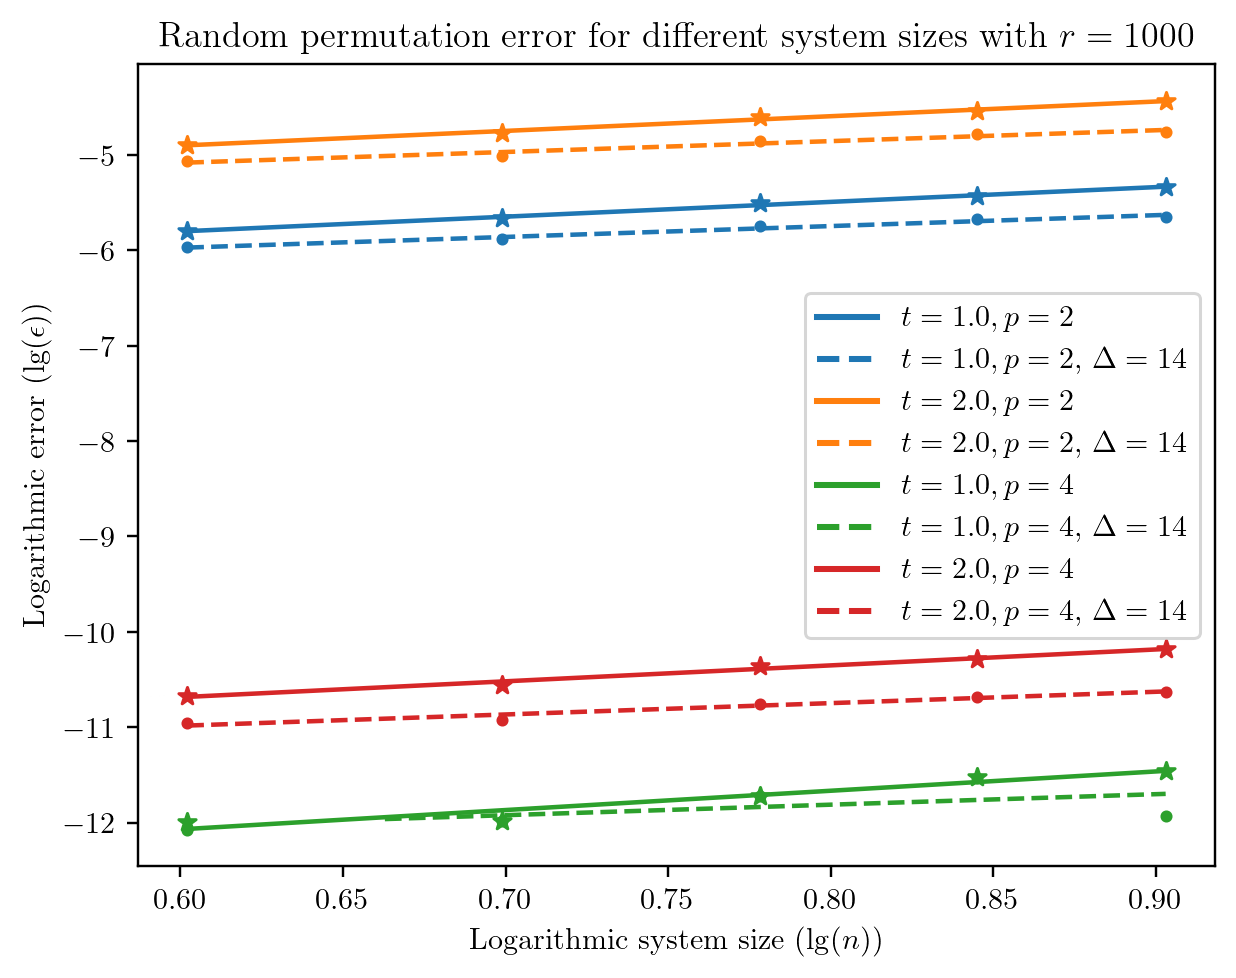

In [3]:
# Random Permutation Error on Heisenberg Model: n-dependence, fix r = 1000
Delta = 14
index = 5 # 1000
n_4 = '../Permutation/norm_1x4_14.mat'
n_5 = '../Permutation/norm_1x5_14.mat'
n_6 = '../Permutation/norm_1x6_14.mat' # 10.01
n_7 = '../Permutation/norm_1x7_14.mat' # 12.01
n_8 = '../Permutation/norm_1x8_14.mat'
# n_9 = '../Permutation/norm_1x9_16.mat'

p_2_1 = np.array([(loadmat(n_4)['p_2_1'].flatten())[index], (loadmat(n_5)['p_2_1'].flatten())[index], (loadmat(n_6)['p_2_1'].flatten())[index], (loadmat(n_7)['p_2_1'].flatten())[index], (loadmat(n_8)['p_2_1'].flatten())[index]]) #, (loadmat(n_9)['p_2_1'].flatten())[index]])
p_2_1_Delta = np.array([(loadmat(n_4)['p_2_1_Delta'].flatten())[index], (loadmat(n_5)['p_2_1_Delta'].flatten())[index], (loadmat(n_6)['p_2_1_Delta'].flatten())[index], (loadmat(n_7)['p_2_1_Delta'].flatten())[index], (loadmat(n_8)['p_2_1_Delta'].flatten())[index]]) #, (loadmat(n_9)['p_2_1_Delta'].flatten())[index]])
p_2_2 = np.array([(loadmat(n_4)['p_2_2'].flatten())[index], (loadmat(n_5)['p_2_2'].flatten())[index], (loadmat(n_6)['p_2_2'].flatten())[index], (loadmat(n_7)['p_2_2'].flatten())[index], (loadmat(n_8)['p_2_2'].flatten())[index]]) #, (loadmat(n_9)['p_2_2'].flatten())[index]])
p_2_2_Delta = np.array([(loadmat(n_4)['p_2_2_Delta'].flatten())[index], (loadmat(n_5)['p_2_2_Delta'].flatten())[index], (loadmat(n_6)['p_2_2_Delta'].flatten())[index], (loadmat(n_7)['p_2_2_Delta'].flatten())[index], (loadmat(n_8)['p_2_2_Delta'].flatten())[index]]) #, (loadmat(n_9)['p_2_2_Delta'].flatten())[index]])
p_4_1 = np.array([(loadmat(n_4)['p_4_1'].flatten())[index], (loadmat(n_5)['p_4_1'].flatten())[index], (loadmat(n_6)['p_4_1'].flatten())[index], (loadmat(n_7)['p_4_1'].flatten())[index], (loadmat(n_8)['p_4_1'].flatten())[index]]) #, (loadmat(n_9)['p_4_1'].flatten())[index]])
p_4_1_Delta = np.array([(loadmat(n_4)['p_4_1_Delta'].flatten())[index], (loadmat(n_5)['p_4_1_Delta'].flatten())[index], (loadmat(n_6)['p_4_1_Delta'].flatten())[index], (loadmat(n_7)['p_4_1_Delta'].flatten())[index], (loadmat(n_8)['p_4_1_Delta'].flatten())[index]]) #, (loadmat(n_9)['p_4_1_Delta'].flatten())[index]])
p_4_2 = np.array([(loadmat(n_4)['p_4_2'].flatten())[index], (loadmat(n_5)['p_4_2'].flatten())[index], (loadmat(n_6)['p_4_2'].flatten())[index], (loadmat(n_7)['p_4_2'].flatten())[index], (loadmat(n_8)['p_4_2'].flatten())[index]]) #, (loadmat(n_9)['p_4_2'].flatten())[index]])
p_4_2_Delta = np.array([(loadmat(n_4)['p_4_2_Delta'].flatten())[index], (loadmat(n_5)['p_4_2_Delta'].flatten())[index], (loadmat(n_6)['p_4_2_Delta'].flatten())[index], (loadmat(n_7)['p_4_2_Delta'].flatten())[index], (loadmat(n_8)['p_4_2_Delta'].flatten())[index]]) #, (loadmat(n_9)['p_4_2_Delta'].flatten())[index]])

p_2_1 = np.log(p_2_1)/np.log(10)
p_2_1_Delta = np.log(p_2_1_Delta)/np.log(10)
p_2_2 = np.log(p_2_2)/np.log(10)
p_2_2_Delta = np.log(p_2_2_Delta)/np.log(10)
p_4_1 = np.log(p_4_1)/np.log(10)
p_4_1_Delta = np.log(p_4_1_Delta)/np.log(10)
p_4_2 = np.log(p_4_2)/np.log(10)
p_4_2_Delta = np.log(p_4_2_Delta)/np.log(10)

step_number = np.array([4, 5, 6, 7, 8])
step_number = np.log(step_number)/np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

# 多项式拟合
coefficients_p_2_1 = np.polyfit(step_number, p_2_1, 1) 
poly_p_2_1 = np.poly1d(coefficients_p_2_1)
coefficients_p_2_1_Delta = np.polyfit(step_number, p_2_1_Delta, 1) 
poly_p_2_1_Delta = np.poly1d(coefficients_p_2_1_Delta)

coefficients_p_2_2 = np.polyfit(step_number, p_2_2, 1)  
poly_p_2_2 = np.poly1d(coefficients_p_2_2)
coefficients_p_2_2_Delta = np.polyfit(step_number, p_2_2_Delta, 1)  
poly_p_2_2_Delta = np.poly1d(coefficients_p_2_2_Delta)

coefficients_p_4_1 = np.polyfit(step_number, p_4_1, 1) 
poly_p_4_1 = np.poly1d(coefficients_p_4_1)
coefficients_p_4_1_Delta = np.polyfit(step_number, p_4_1_Delta, 1) 
poly_p_4_1_Delta = np.poly1d(coefficients_p_4_1_Delta)

coefficients_p_4_2 = np.polyfit(step_number, p_4_2, 1) 
poly_p_4_2 = np.poly1d(coefficients_p_4_2)
coefficients_p_4_2_Delta = np.polyfit(step_number, p_4_2_Delta, 1)  
poly_p_4_2_Delta = np.poly1d(coefficients_p_4_2_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Random permutation error for different system sizes with $r=1000$')
ax.set_xlabel('Logarithmic system size ($\lg(n)$)')
ax.set_ylabel('Logarithmic error ($\lg(\epsilon)$)')

ax.scatter(step_number, p_2_1, marker = '*', color = '#1f77b4')
ax.plot(step_number_new, poly_p_2_1(step_number_new), color = '#1f77b4', linestyle = '-', label='$t=1.0, p=2$')

ax.scatter(step_number, p_2_1_Delta, marker ='.', color = '#1f77b4')
ax.plot(step_number_new, poly_p_2_1_Delta(step_number_new), color = '#1f77b4', linestyle = '--', label='$t=1.0, p=2$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, p_2_2, marker = '*', color = '#ff7f0e')
ax.plot(step_number_new, poly_p_2_2(step_number_new), color = '#ff7f0e', linestyle = '-', label='$t=2.0, p=2$')

ax.scatter(step_number, p_2_2_Delta, marker ='.', color = '#ff7f0e')
ax.plot(step_number_new, poly_p_2_2_Delta(step_number_new), color = '#ff7f0e', linestyle = '--', label='$t=2.0, p=2$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, p_4_1, marker = '*', color = '#2ca02c')
ax.plot(step_number_new, poly_p_4_1(step_number_new), color = '#2ca02c', linestyle = '-', label='$t=1.0, p=4$')

ax.scatter(step_number, p_4_1_Delta, marker ='.', color = '#2ca02c')
ax.plot(step_number_new[20:], poly_p_4_1_Delta(step_number_new)[20:], color = '#2ca02c', linestyle = '--', label='$t=1.0, p=4$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(step_number, p_4_2, marker = '*', color = '#d62728')
ax.plot(step_number_new, poly_p_4_2(step_number_new), color = '#d62728', linestyle = '-', label='$t=2.0, p=4$')

ax.scatter(step_number, p_4_2_Delta, marker ='.', color = '#d62728')
ax.plot(step_number_new, poly_p_4_2_Delta(step_number_new), color = '#d62728', linestyle = '--', label='$t=2.0, p=4$, $\Delta = {Delta}$'.format(Delta = Delta))
ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

print(poly_p_2_1[1])
print(poly_p_2_1_Delta[1])
print(poly_p_2_2[1])
print(poly_p_2_2_Delta[1])
print(poly_p_4_1[1])
print(poly_p_4_1_Delta[1])
print(poly_p_4_2[1])
print(poly_p_4_2_Delta[1])

fig.savefig('Permutation-n.pdf', dpi=600, format='pdf')

### Power Law

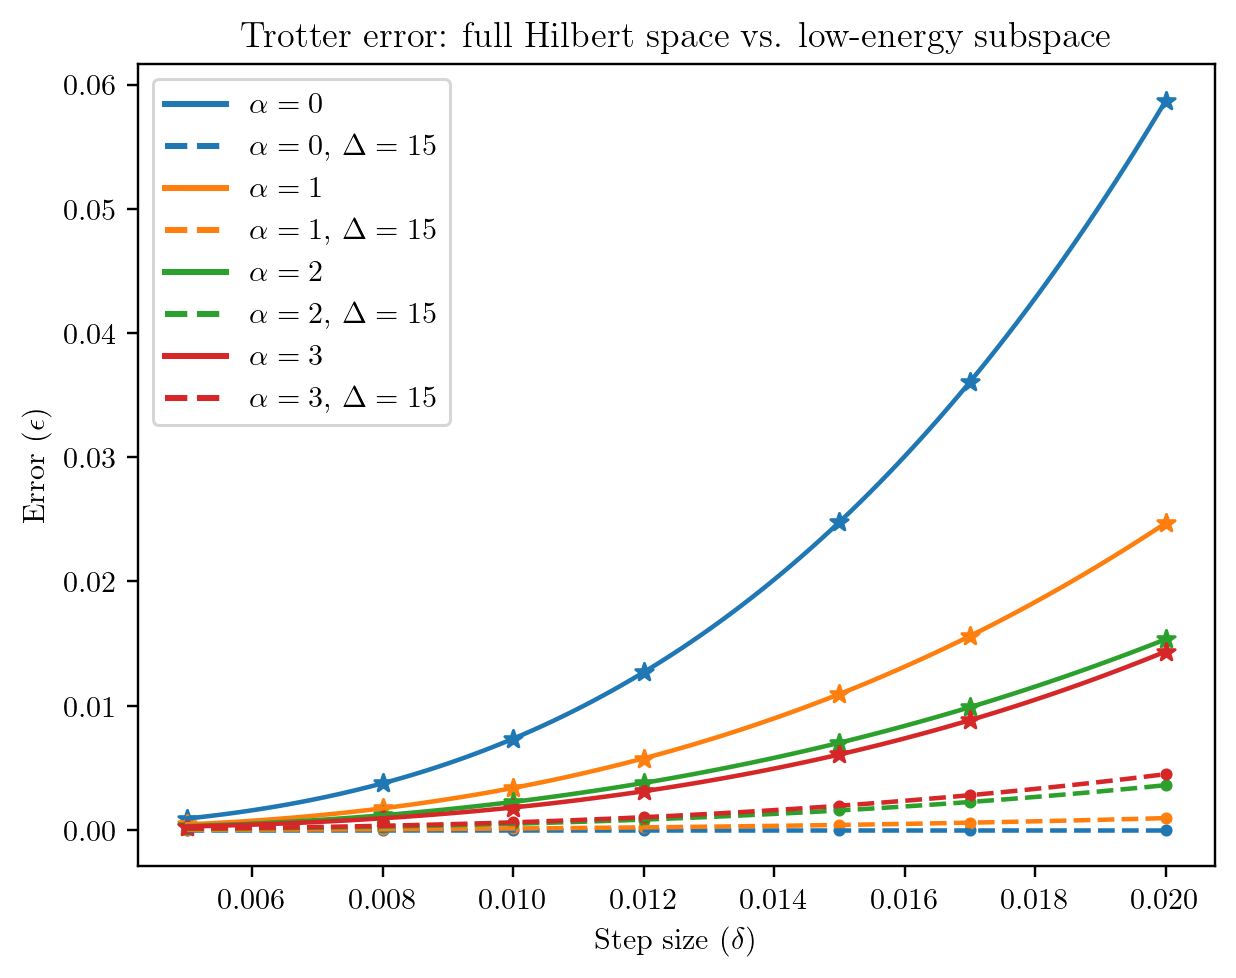

In [2]:
# Trotter Error on Power-Law Model: \alpha-dependence, fix r = 100
Delta = 15
File = '../Trotter/norm_3x3_0_15.mat'

alpha_0 = loadmat(File)['r_100'].flatten()
alpha_0_Delta = loadmat(File)['r_100_Delta'].flatten()

File = '../Trotter/norm_3x3_1_15.mat'
alpha_1 = loadmat(File)['r_100'].flatten()
alpha_1_Delta = loadmat(File)['r_100_Delta'].flatten()

File = '../Trotter/norm_3x3_2_15.mat'
alpha_2 = loadmat(File)['r_100'].flatten()
alpha_2_Delta = loadmat(File)['r_100_Delta'].flatten()

File = '../Trotter/norm_3x3_3_15.mat'
alpha_3 = loadmat(File)['r_100'].flatten()
alpha_3_Delta = loadmat(File)['r_100_Delta'].flatten()

dt = np.array([0.005, 0.008, 0.010, 0.012, 0.015, 0.017, 0.020])
dt_new = np.linspace(min(dt), max(dt), 100)

coefficients_alpha_0 = np.polyfit(dt, alpha_0, 3) 
poly_alpha_0 = np.poly1d(coefficients_alpha_0)
coefficients_alpha_0_Delta = np.polyfit(dt, alpha_0_Delta, 3) 
poly_alpha_0_Delta = np.poly1d(coefficients_alpha_0_Delta)

coefficients_alpha_1 = np.polyfit(dt, alpha_1, 3) 
poly_alpha_1 = np.poly1d(coefficients_alpha_1)
coefficients_alpha_1_Delta = np.polyfit(dt, alpha_1_Delta, 3) 
poly_alpha_1_Delta = np.poly1d(coefficients_alpha_1_Delta)

coefficients_alpha_2 = np.polyfit(dt, alpha_2, 3) 
poly_alpha_2 = np.poly1d(coefficients_alpha_2)
coefficients_alpha_2_Delta = np.polyfit(dt, alpha_2_Delta, 3) 
poly_alpha_2_Delta = np.poly1d(coefficients_alpha_2_Delta)

coefficients_alpha_3 = np.polyfit(dt, alpha_3, 3) 
poly_alpha_3 = np.poly1d(coefficients_alpha_3)
coefficients_alpha_3_Delta = np.polyfit(dt, alpha_3_Delta, 3) 
poly_alpha_3_Delta = np.poly1d(coefficients_alpha_3_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title('Trotter error: full Hilbert space vs. low-energy subspace')
ax.set_xlabel('Step size ($\delta$)')
ax.set_ylabel('Error ($\epsilon$)')

ax.scatter(dt, alpha_0, marker = '*', color = '#1f77b4')
ax.plot(dt_new, poly_alpha_0(dt_new), color = '#1f77b4', linestyle = '-', label='$\\alpha=0$')

ax.scatter(dt, alpha_0_Delta, marker ='.', color = '#1f77b4')
ax.plot(dt_new, poly_alpha_0_Delta(dt_new), color = '#1f77b4', linestyle = '--', label='$\\alpha=0$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, alpha_1, marker = '*', color = '#ff7f0e')
ax.plot(dt_new, poly_alpha_1(dt_new), color = '#ff7f0e', linestyle = '-', label='$\\alpha=1$')

ax.scatter(dt, alpha_1_Delta, marker ='.', color = '#ff7f0e')
ax.plot(dt_new, poly_alpha_1_Delta(dt_new), color = '#ff7f0e', linestyle = '--', label='$\\alpha=1$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, alpha_2, marker = '*', color = '#2ca02c')
ax.plot(dt_new, poly_alpha_2(dt_new), color = '#2ca02c', linestyle = '-', label='$\\alpha=2$')

ax.scatter(dt, alpha_2_Delta, marker ='.', color = '#2ca02c')
ax.plot(dt_new, poly_alpha_2_Delta(dt_new), color = '#2ca02c', linestyle = '--', label='$\\alpha=2$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.scatter(dt, alpha_3, marker = '*', color = '#d62728')
ax.plot(dt_new, poly_alpha_3(dt_new), color = '#d62728', linestyle = '-', label='$\\alpha=3$')

ax.scatter(dt, alpha_3_Delta, marker ='.', color = '#d62728')
ax.plot(dt_new, poly_alpha_3_Delta(dt_new), color = '#d62728', linestyle = '--', label='$\\alpha=3$, $\Delta = {Delta}$'.format(Delta = Delta))

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

fig.savefig('Power-Law.pdf', dpi=600, format='pdf')

### Symmetry Protection

-1.003957109165338
-0.9987517430421747
-2.0030844120425897
-2.000544325478135


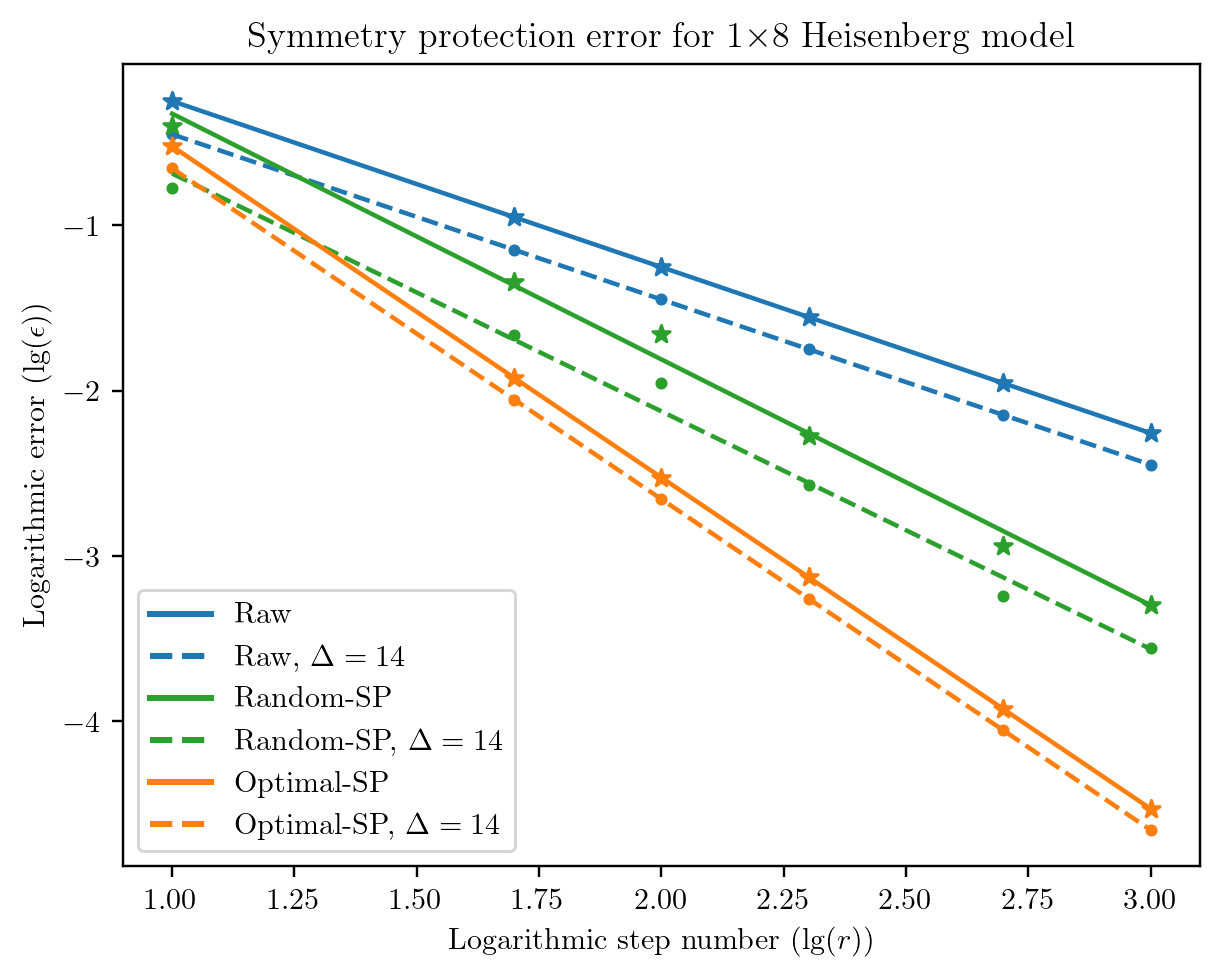

In [4]:
# Random Permutation Error on 1x8 Heisenberg Model
Delta = 14
File = "../Symmetry/norm_1x8_14.mat"

Raw = np.log(loadmat(File)["Raw"].flatten()) / np.log(10)
Raw_Delta = np.log(loadmat(File)["Raw_Delta"].flatten()) / np.log(10)
SP = np.log(loadmat(File)["SP"].flatten()) / np.log(10)
SP_Delta = np.log(loadmat(File)["SP_Delta"].flatten()) / np.log(10)
Random = np.log(loadmat(File)["Random"].flatten()) / np.log(10)
Random_Delta = np.log(loadmat(File)["Random_Delta"].flatten()) / np.log(10)

step_number = np.log(np.array([10, 50, 100, 200, 500, 1000])) / np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

# 多项式拟合
coefficients_Raw = np.polyfit(step_number, Raw, 1)
poly_Raw = np.poly1d(coefficients_Raw)
coefficients_Raw_Delta = np.polyfit(step_number, Raw_Delta, 1)
poly_Raw_Delta = np.poly1d(coefficients_Raw_Delta)

coefficients_SP = np.polyfit(step_number, SP, 1)
poly_SP = np.poly1d(coefficients_SP)
coefficients_SP_Delta = np.polyfit(step_number, SP_Delta, 1)
poly_SP_Delta = np.poly1d(coefficients_SP_Delta)

coefficients_Random = np.polyfit(step_number, Random, 1)
poly_Random = np.poly1d(coefficients_Random)
coefficients_Random_Delta = np.polyfit(step_number, Random_Delta, 1)
poly_Random_Delta = np.poly1d(coefficients_Random_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title("Symmetry protection error for 1$\\times$8 Heisenberg model")
ax.set_xlabel("Logarithmic step number ($\lg(r)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

ax.scatter(step_number, Raw, marker="*", color="#1f77b4")
ax.plot(
    step_number_new,
    poly_Raw(step_number_new),
    color="#1f77b4",
    linestyle="-",
    label="Raw",
)

ax.scatter(step_number, Raw_Delta, marker=".", color="#1f77b4")
ax.plot(
    step_number_new,
    poly_Raw_Delta(step_number_new),
    color="#1f77b4",
    linestyle="--",
    label="Raw, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.scatter(step_number, Random, marker="*", color="#2ca02c")
ax.plot(
    step_number_new,
    poly_Random(step_number_new),
    color="#2ca02c",
    linestyle="-",
    label="Random-SP",
)

ax.scatter(step_number, Random_Delta, marker=".", color="#2ca02c")
ax.plot(
    step_number_new,
    poly_Random_Delta(step_number_new),
    color="#2ca02c",
    linestyle="--",
    label="Random-SP, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.scatter(step_number, SP, marker="*", color="#ff7f0e")
ax.plot(
    step_number_new,
    poly_SP(step_number_new),
    color="#ff7f0e",
    linestyle="-",
    label="Optimal-SP",
)

ax.scatter(step_number, SP_Delta, marker=".", color="#ff7f0e")
ax.plot(
    step_number_new,
    poly_SP_Delta(step_number_new),
    color="#ff7f0e",
    linestyle="--",
    label="Optimal-SP, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

print(poly_Raw[1])
print(poly_Raw_Delta[1])
print(poly_SP[1])
print(poly_SP_Delta[1])


fig.savefig("Symmetry-1x8.pdf", dpi=600, format="pdf")

0.9545499665569682
0.4285176452916096
1.1077725188297725
0.7999078846007966


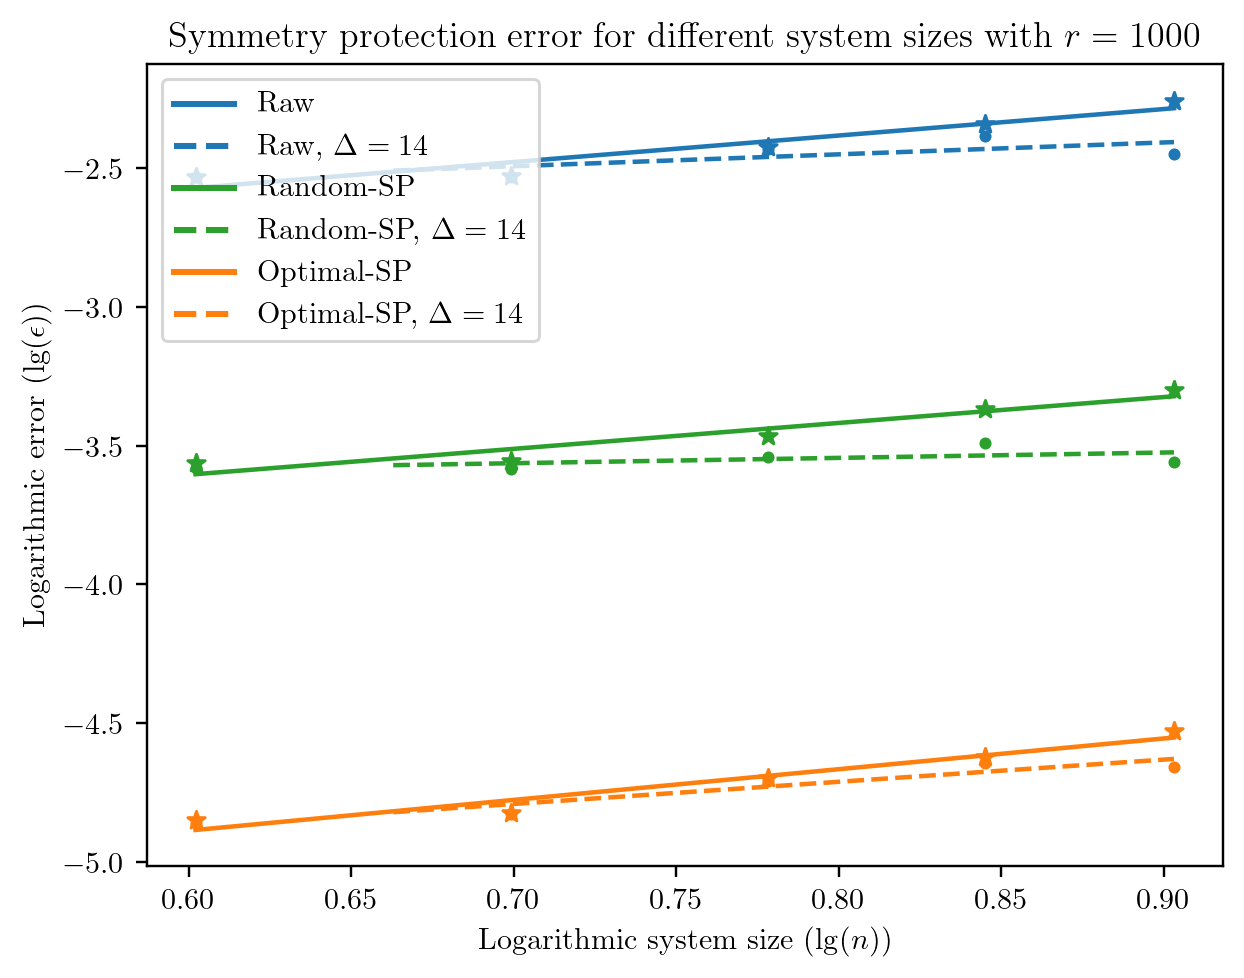

In [5]:
# Symmetry Protection Error on Heisenberg Model: n-dependence, fix r = 1000
Delta = 14
index = 5  # 1000
n_4 = "../Symmetry/norm_1x4_14.mat"
n_5 = "../Symmetry/norm_1x5_14.mat"
n_6 = "../Symmetry/norm_1x6_14.mat"  # 10.01
n_7 = "../Symmetry/norm_1x7_14.mat"  # 12.01
n_8 = "../Symmetry/norm_1x8_14.mat"
# n_9 = '../Symmetry/norm_1x9_16.mat'

Raw = np.array(
    [
        (loadmat(n_4)["Raw"].flatten())[index],
        (loadmat(n_5)["Raw"].flatten())[index],
        (loadmat(n_6)["Raw"].flatten())[index],
        (loadmat(n_7)["Raw"].flatten())[index],
        (loadmat(n_8)["Raw"].flatten())[index],
    ]
)  # , (loadmat(n_9)['Raw'].flatten())[index]])
Raw_Delta = np.array(
    [
        (loadmat(n_4)["Raw_Delta"].flatten())[index],
        (loadmat(n_5)["Raw_Delta"].flatten())[index],
        (loadmat(n_6)["Raw_Delta"].flatten())[index],
        (loadmat(n_7)["Raw_Delta"].flatten())[index],
        (loadmat(n_8)["Raw_Delta"].flatten())[index],
    ]
)  # , (loadmat(n_9)['Raw_Delta'].flatten())[index]])
SP = np.array(
    [
        (loadmat(n_4)["SP"].flatten())[index],
        (loadmat(n_5)["SP"].flatten())[index],
        (loadmat(n_6)["SP"].flatten())[index],
        (loadmat(n_7)["SP"].flatten())[index],
        (loadmat(n_8)["SP"].flatten())[index],
    ]
)  # , (loadmat(n_9)['SP'].flatten())[index]])
SP_Delta = np.array(
    [
        (loadmat(n_4)["SP_Delta"].flatten())[index],
        (loadmat(n_5)["SP_Delta"].flatten())[index],
        (loadmat(n_6)["SP_Delta"].flatten())[index],
        (loadmat(n_7)["SP_Delta"].flatten())[index],
        (loadmat(n_8)["SP_Delta"].flatten())[index],
    ]
)  # , (loadmat(n_9)['SP_Delta'].flatten())[index]])
Random = np.array(
    [
        (loadmat(n_4)["Random"].flatten())[index],
        (loadmat(n_5)["Random"].flatten())[index],
        (loadmat(n_6)["Random"].flatten())[index],
        (loadmat(n_7)["Random"].flatten())[index],
        (loadmat(n_8)["Random"].flatten())[index],
    ]
)  # , (loadmat(n_9)['Random'].flatten())[index]])
Random_Delta = np.array(
    [
        (loadmat(n_4)["Random_Delta"].flatten())[index],
        (loadmat(n_5)["Random_Delta"].flatten())[index],
        (loadmat(n_6)["Random_Delta"].flatten())[index],
        (loadmat(n_7)["Random_Delta"].flatten())[index],
        (loadmat(n_8)["Random_Delta"].flatten())[index],
    ]
)  # , (loadmat(n_9)['Random_Delta'].flatten())[index]])

Raw = np.log(Raw) / np.log(10)
Raw_Delta = np.log(Raw_Delta) / np.log(10)
SP = np.log(SP) / np.log(10)
SP_Delta = np.log(SP_Delta) / np.log(10)
Random = np.log(Random) / np.log(10)
Random_Delta = np.log(Random_Delta) / np.log(10)

step_number = np.array([4, 5, 6, 7, 8])
step_number = np.log(step_number) / np.log(10)
step_number_new = np.linspace(min(step_number), max(step_number), 100)

# 多项式拟合
coefficients_Raw = np.polyfit(step_number, Raw, 1)
poly_Raw = np.poly1d(coefficients_Raw)
coefficients_Raw_Delta = np.polyfit(step_number, Raw_Delta, 1)
poly_Raw_Delta = np.poly1d(coefficients_Raw_Delta)

coefficients_SP = np.polyfit(step_number, SP, 1)
poly_SP = np.poly1d(coefficients_SP)
coefficients_SP_Delta = np.polyfit(step_number, SP_Delta, 1)
poly_SP_Delta = np.poly1d(coefficients_SP_Delta)

coefficients_Random = np.polyfit(step_number, Random, 1)
poly_Random = np.poly1d(coefficients_Random)
coefficients_Random_Delta = np.polyfit(step_number, Random_Delta, 1)
poly_Random_Delta = np.poly1d(coefficients_Random_Delta)

fig, ax = plt.subplots(dpi=217)
ax.set_title("Symmetry protection error for different system sizes with $r=1000$")
ax.set_xlabel("Logarithmic system size ($\lg(n)$)")
ax.set_ylabel("Logarithmic error ($\lg(\epsilon)$)")

ax.scatter(step_number, Raw, marker="*", color="#1f77b4")
ax.plot(
    step_number_new,
    poly_Raw(step_number_new),
    color="#1f77b4",
    linestyle="-",
    label="Raw",
)

ax.scatter(step_number, Raw_Delta, marker=".", color="#1f77b4")
ax.plot(
    step_number_new[20:],
    poly_Raw_Delta(step_number_new)[20:],
    color="#1f77b4",
    linestyle="--",
    label="Raw, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.scatter(step_number, Random, marker="*", color="#2ca02c")
ax.plot(
    step_number_new,
    poly_Random(step_number_new),
    color="#2ca02c",
    linestyle="-",
    label="Random-SP",
)

ax.scatter(step_number, Random_Delta, marker=".", color="#2ca02c")
ax.plot(
    step_number_new[20:],
    poly_Random_Delta(step_number_new)[20:],
    color="#2ca02c",
    linestyle="--",
    label="Random-SP, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.scatter(step_number, SP, marker="*", color="#ff7f0e")
ax.plot(
    step_number_new,
    poly_SP(step_number_new),
    color="#ff7f0e",
    linestyle="-",
    label="Optimal-SP",
)

ax.scatter(step_number, SP_Delta, marker=".", color="#ff7f0e")
ax.plot(
    step_number_new[20:],
    poly_SP_Delta(step_number_new)[20:],
    color="#ff7f0e",
    linestyle="--",
    label="Optimal-SP, $\Delta = {Delta}$".format(Delta=Delta),
)

ax.legend(handler_map={plt.Line2D: ColorLineStyleHandler()})

print(poly_Raw[1])
print(poly_Raw_Delta[1])
print(poly_SP[1])
print(poly_SP_Delta[1])

fig.savefig("Symmetry-n.pdf", dpi=600, format="pdf")